In [1]:
import pandas as pd
import numpy as np
import os
import string
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import StrMethodFormatter
%matplotlib inline
os.getcwd()
os.chdir('C:/Users/peiyaozhao/Documents/GitHub/tracking-msa-ghg/bin/jupyter')

In [2]:
summary = pd.read_csv('C:/Users/peiyaozhao/NARS Dropbox/Projects/CT-GHG-Inventories/Results/Automated-Emissions-Summary.csv')

summary.columns = pd.MultiIndex.from_tuples([(col, summary.iloc[0][col]) for col in summary.columns])

# Drop the first row (which is now part of the column index)
summary = summary.iloc[1:]
summary.columns = summary.columns.droplevel()

In [3]:
#mobile emissions 
mobile = pd.read_csv('C:/Users/peiyaozhao/Documents/GitHub/tracking-msa-ghg/data/tidy/Mobile-combustion-emissions.csv')
mobile = mobile['GHG Emissions(MMTCO2e)']
electric = pd.read_csv('C:/Users/peiyaozhao/NARS Dropbox/Projects/CT-GHG-Inventories/Results/2021-Electricity-consumption-emissions.csv')
electric = electric['Total Emissions (MMTCO2e)']
residential = summary.loc[25:27,['Total Emissions (MMTCO2e)']]['Total Emissions (MMTCO2e)'].reset_index(drop=True).astype(float)
commercial = summary.loc[28:30,['Total Emissions (MMTCO2e)']]['Total Emissions (MMTCO2e)'].reset_index(drop=True).astype(float)
industrial = summary.loc[31:33,['Total Emissions (MMTCO2e)']]['Total Emissions (MMTCO2e)'].reset_index(drop=True).astype(float)
stationary = residential+commercial+industrial
solid_waste = summary.loc[19:21,['Total Emissions (MMTCO2e)']]['Total Emissions (MMTCO2e)'].reset_index(drop=True).astype(float)
agriculture = pd.read_csv('C:/Users/peiyaozhao/Documents/GitHub/tracking-msa-ghg/data/tidy/agriculture-emissions.csv')
agriculture = agriculture['GHG Emissions (MMTCO2e)']
wastewater = summary.loc[43:45,['Total Emissions (MMTCO2e)']]['Total Emissions (MMTCO2e)'].reset_index(drop=True).astype(float)
forest = pd.read_csv('C:/Users/peiyaozhao/Documents/GitHub/tracking-msa-ghg/data/tidy/land-cover-emissions.csv')
forest = forest['Total carbon sequestration (MMTCO2e)']*(-1)

In [4]:
import pandas as pd

# Creating a sample DataFrame
data = {
    'MSA': ['New Haven-Milford', 'Hartford-east Hartford-Middletown', 'Bridgeport-Stamford-Norwalk'],
    'Mobile': mobile,
    'Electric': electric,
    'Stationary': stationary,
    'Solid waste': solid_waste,
    'Wastewater': wastewater,
    'Agriculture': agriculture,
    'Forestry': forest,
}

df = pd.DataFrame(data)

# Display the created DataFrame

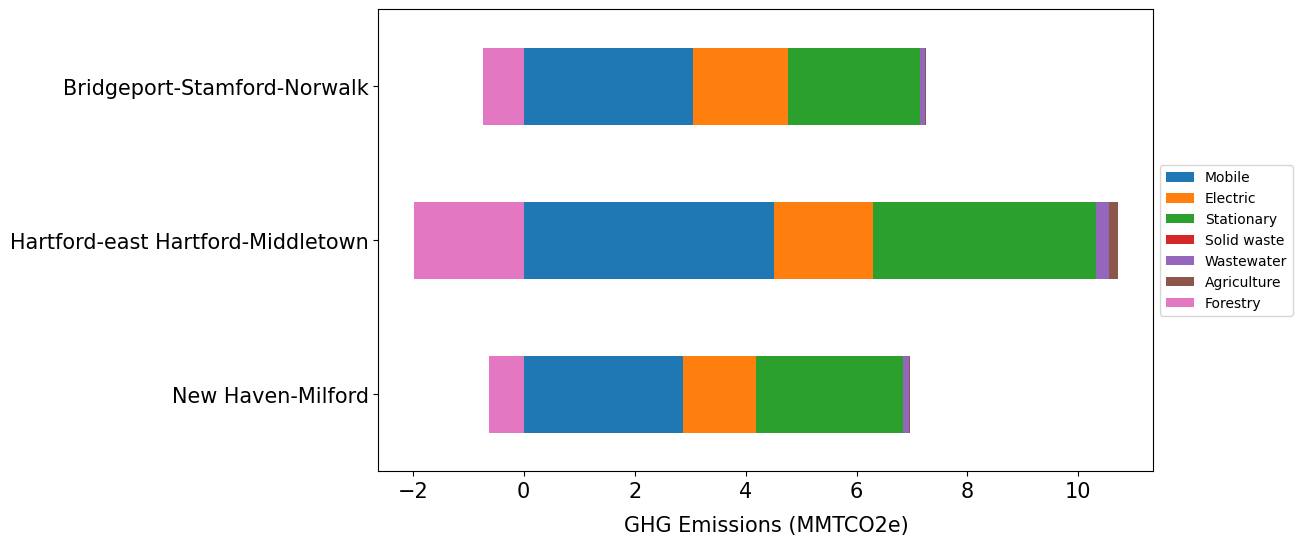

In [5]:
df.set_index('MSA', inplace=True)

# Plot the DataFrame with x and y axes flipped
ax = df.plot(kind='barh', stacked=True, figsize=(10, 6))
ax.set_xlabel('GHG Emissions (MMTCO2e)', fontsize=15,labelpad=10)

# Remove y-axis label
ax.set_ylabel('')

# Set the legend outside of the graph
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Set font size for labels and ticks
ax.tick_params(axis='both', which='both', labelsize=15)



# Show the plot
plt.savefig('C:/Users/peiyaozhao/Documents/GitHub/tracking-msa-ghg/figures/emissions-summary.png', dpi=100, bbox_inches='tight')

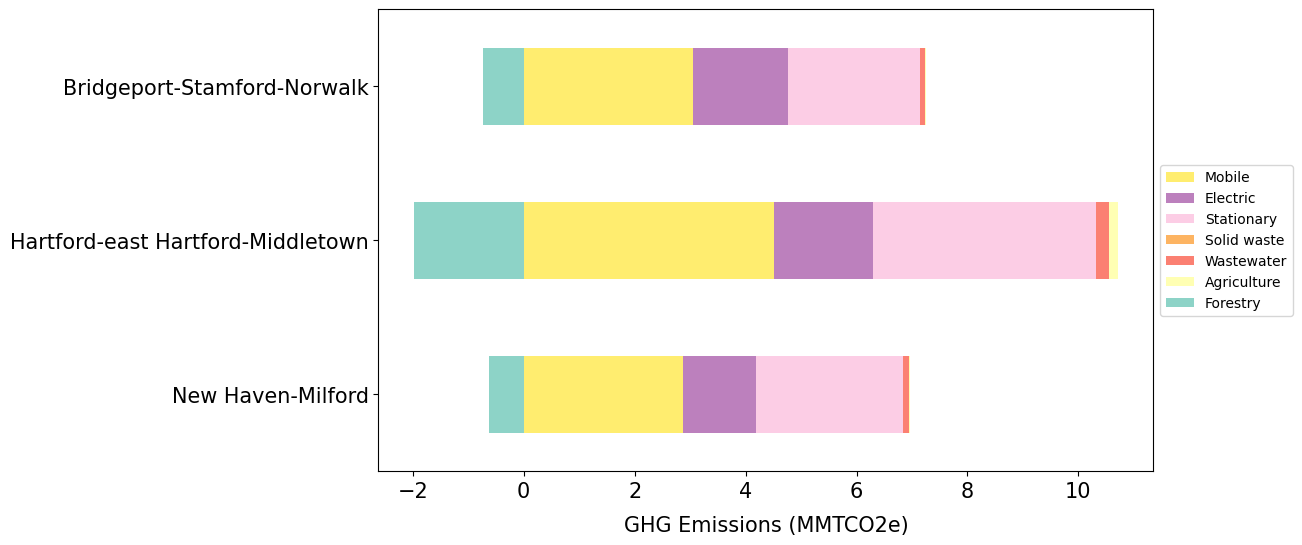

In [6]:
# Choose a distinctive colormap (e.g., 'Set1')
colormap = 'Set3_r'

# Adjust the brightness (make colors darker)
# Plot the DataFrame with x and y axes flipped, and using the specified colormap
ax = df.plot(kind='barh', stacked=True, figsize=(10, 6), colormap=colormap)
ax.set_xlabel('GHG Emissions (MMTCO2e)', fontsize=15, labelpad=10)

# Remove y-axis label
ax.set_ylabel('')

# Set the legend outside of the graph
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Set font size for labels and ticks
ax.tick_params(axis='both', which='both', labelsize=15)

# Show the plot or save it to a file
plt.savefig('C:/Users/peiyaozhao/Documents/GitHub/tracking-msa-ghg/figures/emissions-summary.png', dpi=100, bbox_inches='tight')


In [7]:
df['Total']=df.sum(axis=1)
df

,Mobile,Electric,Stationary,Solid waste,Wastewater,Agriculture,Forestry,Total
MSA,,,,,,,,
New Haven-Milford,2.875389,1.314940,2.656305,0.000000,0.092857,0.029241,-0.627891,6.340842
Hartford-east Hartford-Middletown,4.509576,1.790219,4.019964,0.000476,0.227553,0.170435,-1.983747,8.734475
Bridgeport-Stamford-Norwalk,3.052285,1.719647,2.379706,0.000000,0.076608,0.015322,-0.737232,6.506337


In [8]:
mobile_ratio = df['Mobile']/df['Total']
#resi = df['Residential']/df['Total']
fore = df['Forestry']/df['Total']
elec = df['Electric']/df['Total']
elec

MSA
New Haven-Milford                    0.207376
Hartford-east Hartford-Middletown    0.204960
Bridgeport-Stamford-Norwalk          0.264303
dtype: float64

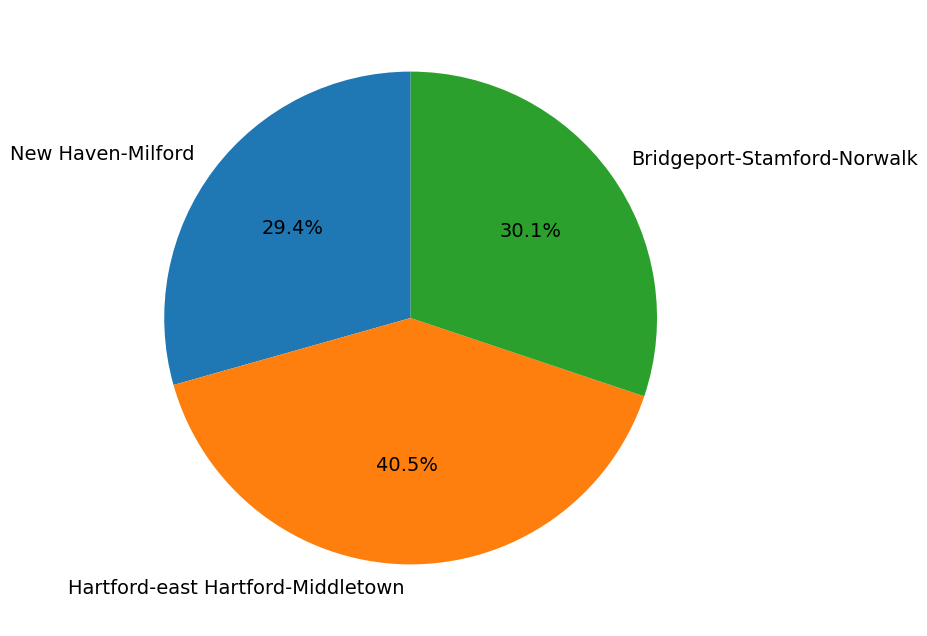

In [9]:


# Plot the pie chart
ax = df.sum(axis=1).plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8, 8), textprops={'fontsize': 14})
ax.set_ylabel('')  # Remove y-axis label


# Show the plot
plt.savefig('C:/Users/peiyaozhao/Documents/GitHub/tracking-msa-ghg/figures/emissions-total.png', dpi=100, bbox_inches='tight')

In [10]:
#emissions per capita

mobile = pd.read_csv('C:/Users/peiyaozhao/Documents/GitHub/tracking-msa-ghg/data/tidy/Mobile-combustion-emissions.csv')
mobile = mobile['emissions per capita (MTCO2e)']
electric = pd.read_csv('C:/Users/peiyaozhao/NARS Dropbox/Projects/CT-GHG-Inventories/Results/2021-Electricity-consumption-emissions.csv')
electric =electric['Emissions per capita (MTCO2e)']
residential = summary.loc[25:27,['Emissions per capita (MTCO2e)']]['Emissions per capita (MTCO2e)'].reset_index(drop=True).astype(float)
commercial = summary.loc[28:30,['Emissions per capita (MTCO2e)']]['Emissions per capita (MTCO2e)'].reset_index(drop=True).astype(float)
industrial = summary.loc[31:33,['Emissions per capita (MTCO2e)']]['Emissions per capita (MTCO2e)'].reset_index(drop=True).astype(float)
stationary = residential+commercial+industrial
solid_waste = summary.loc[19:21,['Emissions per capita (MTCO2e)']]['Emissions per capita (MTCO2e)'].reset_index(drop=True).astype(float)
agriculture = pd.read_csv('C:/Users/peiyaozhao/Documents/GitHub/tracking-msa-ghg/data/tidy/agriculture-emissions.csv')
agriculture['emissions per capita (MTCO2e)']=agriculture['GHG Emissions (MMTCO2e)']/[862127,1213123,947328]*1000000
agriculture=agriculture['emissions per capita (MTCO2e)']
wastewater = summary.loc[43:45,['Emissions per capita (MTCO2e)']]['Emissions per capita (MTCO2e)'].reset_index(drop=True).astype(float)
forest = pd.read_csv('C:/Users/peiyaozhao/Documents/GitHub/tracking-msa-ghg/data/tidy/land-cover-emissions.csv')
forest = forest['Total carbon sequestration (MMTCO2e)']*(-1)/[862127,1213123,947328]*1000000

# Creating a sample DataFrame
data1 = {
    'MSA': ['New Haven-Milford', 'Hartford-east Hartford-Middletown', 'Bridgeport-Stamford-Norwalk'],
    'Mobile': mobile,
    'Electric': electric,
    'Stationary': stationary,
    'Solid waste': solid_waste,
    'Wastewater': wastewater,
    'Agriculture': agriculture,
    'Forestry': forest,
}


df1 = pd.DataFrame(data1)
df1

,MSA,Mobile,Electric,Stationary,Solid waste,Wastewater,Agriculture,Forestry
0,New Haven-Milford,3.325107,1.520600,3.104128,0.000000,0.107380,0.033917,-0.728305
1,Hartford-east Hartford-Middletown,3.716712,1.475466,3.264222,0.000384,0.183675,0.140493,-1.635240
2,Bridgeport-Stamford-Norwalk,3.191278,1.797955,2.445789,0.000000,0.077668,0.016174,-0.778222


In [12]:
df1['Total']=df1.iloc[:, 1:].sum(axis=1)
df1

,MSA,Mobile,Electric,Stationary,Solid waste,Wastewater,Agriculture,Forestry,Total
0,New Haven-Milford,3.325107,1.520600,2.900961,0.000000,0.107380,0.033917,-0.728305,7.159660
1,Hartford-east Hartford-Middletown,3.589597,1.475466,3.028011,0.000384,0.183675,0.137594,-1.508097,6.906630
2,Bridgeport-Stamford-Norwalk,3.104147,1.747744,2.262521,0.000000,0.077668,0.014747,-0.671185,6.535643


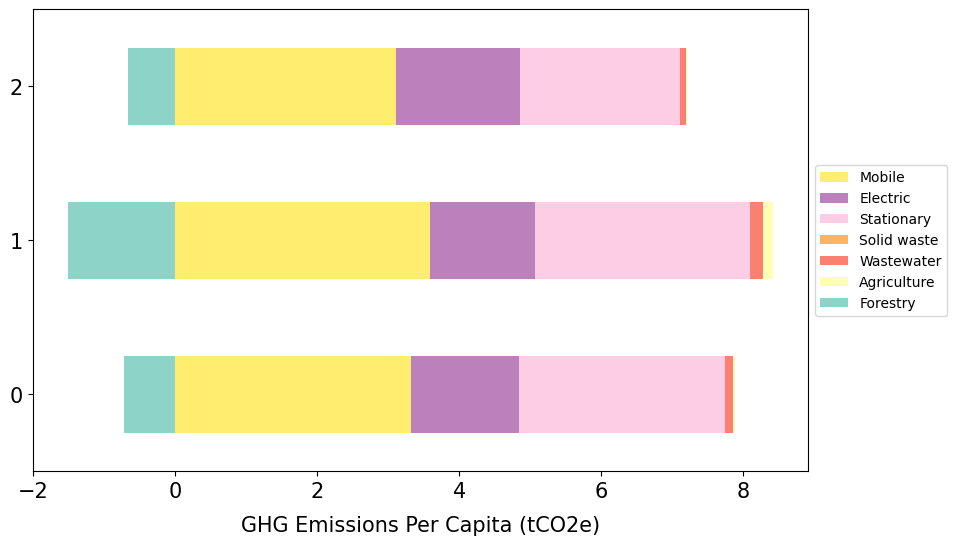

In [13]:

# Choose a distinctive colormap (e.g., 'Set1')
colormap = 'Set3_r'

# Adjust the brightness (make colors darker)
# Plot the DataFrame with x and y axes flipped, and using the specified colormap
ax = df1.iloc[:,:-1].plot(kind='barh', stacked=True, figsize=(10, 6), colormap=colormap)
ax.set_xlabel('GHG Emissions Per Capita (tCO2e)', fontsize=15, labelpad=10)

# Remove y-axis label
ax.set_ylabel('')

# Set the legend outside of the graph
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Set font size for labels and ticks
ax.tick_params(axis='both', which='both', labelsize=15)

# Show the plot or save it to a file
plt.savefig('C:/Users/peiyaozhao/Documents/GitHub/tracking-msa-ghg/figures/emissions-summary.png', dpi=100, bbox_inches='tight')

# Show the plot
plt.savefig('C:/Users/peiyaozhao/Documents/GitHub/tracking-msa-ghg/figures/emissions-per-capita.png', dpi=100, bbox_inches='tight')

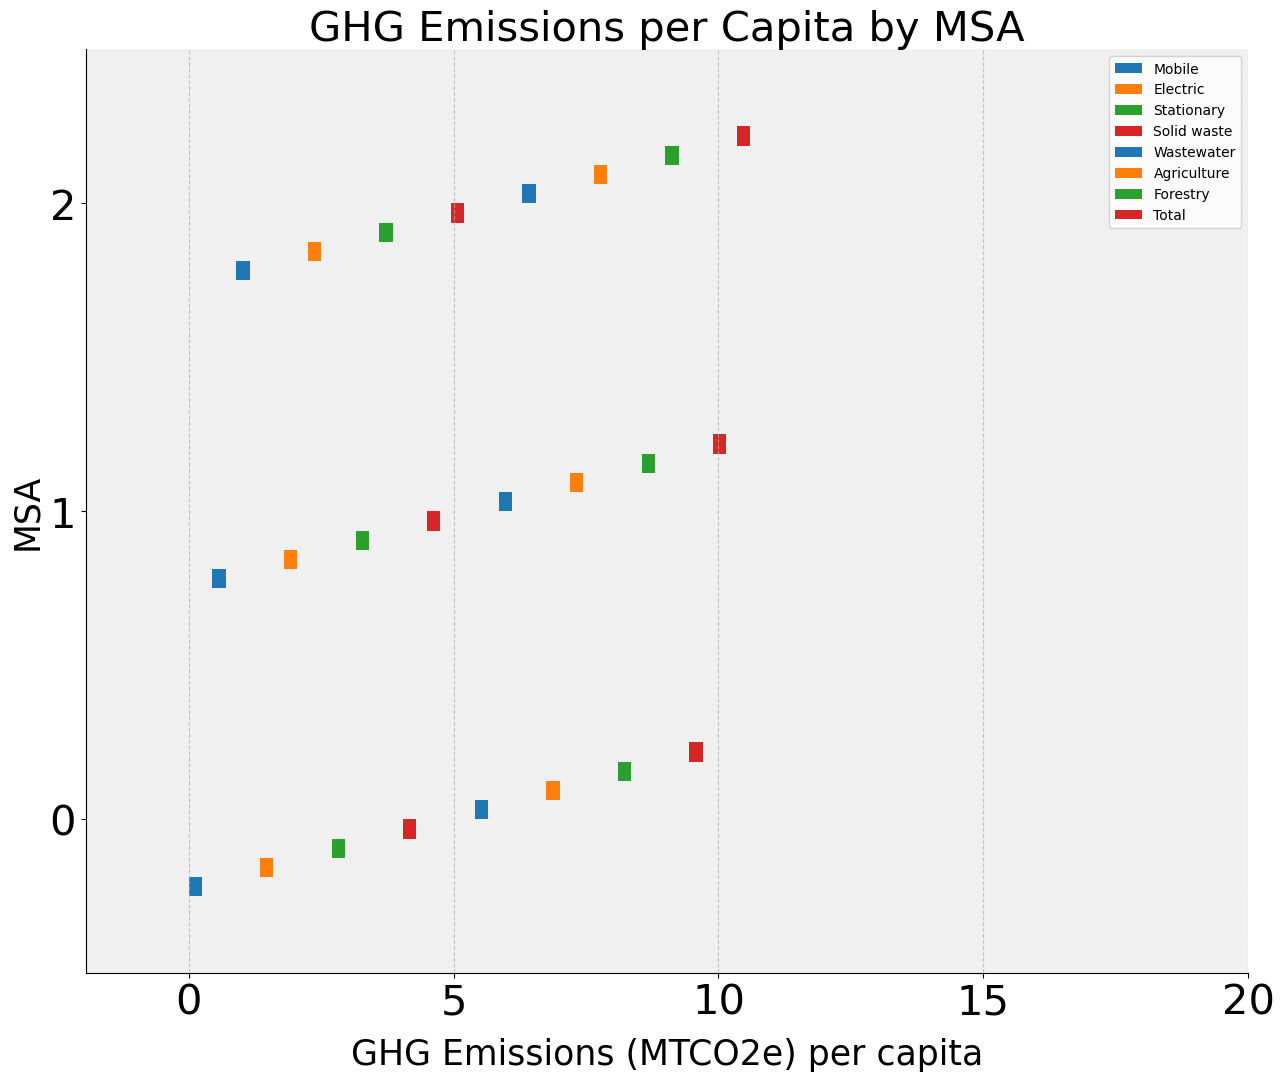

In [14]:
import matplotlib.pyplot as plt

# Plot the DataFrame using pandas plot function
ax = df1.plot(kind='barh', figsize=(15, 12), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

# Adjust the width and spacing of the bars
bar_width = 0.25
bar_spacing = 0.2
for i, bar in enumerate(ax.patches):
    bar.set_width(bar_width)
    bar.set_x(i * (bar_width + bar_spacing))

# Add grid lines
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Set background color
ax.set_facecolor('#f0f0f0')

# Set labels and legend
ax.set_xlabel('GHG Emissions (MTCO2e) per capita', fontsize=25, labelpad=10)
ax.set_ylabel('MSA', fontsize=25)
ax.set_title('GHG Emissions per Capita by MSA', fontsize=30)

# Remove unnecessary spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set font size for labels and ticks
ax.tick_params(axis='both', which='both', labelsize=30)
ax.xaxis.set_tick_params(labelsize=30)
ax.yaxis.set_tick_params(labelsize=30)

# Limit x-axis ticks
ax.set_xticks(range(0, 21, 5))

# Show the plot
plt.savefig('C:/Users/peiyaozhao/Documents/GitHub/tracking-msa-ghg/figures/emissions-per-capita.png', dpi=100, bbox_inches='tight')
plt.show()
